---
title: "Introduction to TensorFlow"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-04-01"
categories: [python, datacamp, machine learning, tensorflow]
image: "IntroToTensorflow.png"

---

# Introduction to TensorFlow

To build advanced models in TensorFlow 2, you must first understand the basics. The purpose of this chapter is to teach you how to define constants, variables, add and multiply tensors, and compute derivatives. A basic understanding of linear algebra is helpful, but not essential.

This **Introduction to TensorFlow** is part of [Datacamp course: Introduction to TensorFlow in Python] Until recently, cutting-edge computer vision algorithms could not distinguish between images of cats and dogs. Today, a skilled data scientist equipped with a laptop can classify tens of thousands of objects more accurately than a human eye. This course uses TensorFlow 2.6 to develop, train, and predict models that have fueled major advances in recommendation systems, image classification, and financial technology. In this course, you will learn both high-level APIs that will allow you to design and train deep learning models in 15 lines of code, as well as low-level APIs that will allow you to go beyond off-the-shelf procedures. Additionally, you will learn how to accurately predict housing prices, credit card defaults, and images of sign language gestures.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Introduction to TensorFlow in Python]: (https://app.datacamp.com/learn/courses/introduction-to-tensorflow-in-python)

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.__version__

'2.12.0'

# Constants and variables

* Tensorflow
    * Open-source library for graph-based numerical computation
    * Low and high level API
        * Addition, multiplication, differentiation
        * Machine Learning models
    * In v2.0
        * Eager execution by default
        * Model building with Keras and Estimators
* Tensor
    * Generalization of vectors and matrices
    * Collection of numbers
    * Specific shape

In [5]:
credit = pd.read_csv('dataset/credit.csv')
credit_numpy = credit.to_numpy()
credit.head()

,0,1,2,3
0,2.0,1.0,24.0,3913.0
1,2.0,2.0,26.0,2682.0
2,2.0,2.0,34.0,29239.0
3,2.0,1.0,37.0,46990.0
4,2.0,1.0,57.0,8617.0


In [6]:
credit_constant = tf.constant(credit_numpy)

# Print constant datatype
print('The datatype is:', credit_constant.dtype)

# Print constant shape
print('The shape is:', credit_constant.shape)

Metal device set to: Apple M2 Pro
The datatype is: <dtype: 'float64'>
The shape is: (30000, 4)


## Defining variables

A variable differs from a constant in that its value can be modified. This is very useful when we wish to train a model by updating its parameters. Constants cannot be used for this purpose, so variables are the best option.

Here is an example of defining and working with a variable.

In [7]:
A1 = tf.Variable([1, 2, 3, 4])

# Print the variable A1
print(A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print(B1)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>
[1 2 3 4]


# Basic operations

![](IntroTensorFlow-1.png)

## Performing element-wise multiplication
Element-wise multiplication in TensorFlow is performed using two tensors with identical shapes. This is because the operation multiplies elements in corresponding positions in the two tensors.

In [8]:
A1 = tf.constant([1, 2, 3, 4])
A23 = tf.constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = tf.ones_like(A1)
B23 = tf.ones_like(A23)

# Perform element-wise multiplication
C1 = tf.multiply(A1, B1)
C23 = tf.multiply(A23, B23)

# Print the tensors C1 and C23
print('C1: {}'.format(C1.numpy()))
print('C23: {}'.format(C23.numpy()))

C1: [1 2 3 4]
C23: [[1 2 3]
 [1 6 4]]


## Making predictions with matrix multiplication

This process will yield a vector of parameters that can be multiplied by the input data to generate predictions. In this exercise, you will use input data, features, and a target vector, bill, which are taken from a credit card dataset

The matrix of input data, features, contains two columns: education level and age. The target vector, bill, is the size of the credit card borrower's bill.

Since we have not trained the model, you will enter a guess for the values of the parameter vector, params. You will then use matmul() to perform matrix multiplication of features by params to generate predictions, billpred, which you will compare with bill.

In [9]:
features = tf.constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = tf.constant([[1000], [150]])
bill = tf.constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = tf.matmul(features, params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


## Summing over tensor dimensions
You've been given a matrix, wealth. This contains the value of bond and stock wealth for five individuals in thousands of dollars.

In [11]:
wealth = tf.constant([[11, 50], [7, 2], [4, 60], [3, 0], [25, 10]])
tf.reduce_sum(wealth)

<tf.Tensor: shape=(), dtype=int32, numpy=172>

In [12]:
tf.reduce_sum(wealth, 1)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([61,  9, 64,  3, 35], dtype=int32)>

# Advanced operations

Finding th optimum
In many problems, we will want to find the optimum of a function
Minimum: Lowest value of a loss function
Maximum: Highest value of objective function
We can do this using the gradient() operation
Optimum: Find a point where gradient = 0
Minimum: Change in gradient > 0
Maximum: Change in gradient < 0
Reshaping tensors
Later in the course, you will classify images of sign language letters using a neural network. In some cases, the network will take 1-dimensional tensors as inputs, but your data will come in the form of images, which will either be either 2- or 3-dimensional tensors, depending on whether they are grayscale or color images.

The figure below shows grayscale and color images of the sign language letter A. The two images have been imported for you and converted to the numpy arrays gray_tensor and color_tensor. Reshape these arrays into 1-dimensional vectors using the reshape operation, which has been imported for you from tensorflow. Note that the shape of gray_tensor is 28x28 and the shape of color_tensor is 28x28x3.

In [13]:
gray_tensor = pd.read_csv('dataset/gray_tensor.csv').to_numpy()

color_tensor = pd.read_csv('dataset/color_tensor.csv').to_numpy().reshape(28, 28, 3)

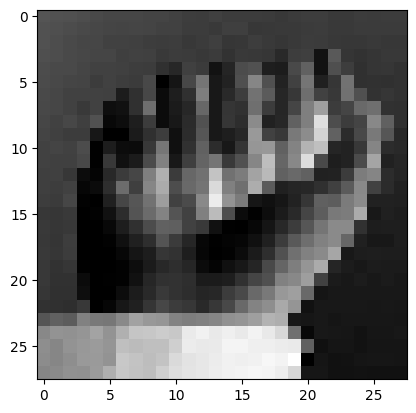

In [14]:
import matplotlib.pyplot as plt

plt.imshow(gray_tensor, cmap=plt.cm.binary);

In [15]:
gray_vector = tf.reshape(gray_tensor, (784, 1))

# Reshape the color image tensor into a vector
color_vector = tf.reshape(color_tensor, (2352, 1))

## Optimizing with gradients

![](IntroTensorFlow-2.png)

In [16]:
def compute_gradient(x0):
    # Define x as a variable with an initial value of x0
    x = tf.Variable(x0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y = x * x
    # Return the gradient of y with respect to x
    return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


In [17]:
print("\nNotice that the slope is positive at x = 1, which means that we can lower the loss by reducing x. The slope is negative at x = -1, which means that we can lower the loss by increasing x. The slope at x = 0 is 0, which means that we cannot lower the loss by either increasing or decreasing x. This is because the loss is minimized at x = 0.")


Notice that the slope is positive at x = 1, which means that we can lower the loss by reducing x. The slope is negative at x = -1, which means that we can lower the loss by increasing x. The slope at x = 0 is 0, which means that we cannot lower the loss by either increasing or decreasing x. This is because the loss is minimized at x = 0.


## Working with image data
You are given a black-and-white image of a letter, which has been encoded as a tensor, letter. You want to determine whether the letter is an X or a K. You don't have a trained neural network, but you do have a simple model, model, which can be used to classify letter.

The 3x3 tensor, letter, and the 1x3 tensor, model, are available in the Python shell. You can determine whether letter is a K by multiplying letter by model, summing over the result, and then checking if it is equal to 1. As with more complicated models, such as neural networks, model is a collection of weights, arranged in a tensor.

In [18]:
letter = np.array([[1.0, 0, 1.0], [1., 1., 0], [1., 0, 1.] ])
model = np.array([[1., 0., -1.]])

In [19]:
model = tf.reshape(model, (3, 1))

# Multiply letter by model
output = tf.matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = tf.reduce_sum(output)
print(prediction.numpy())

1.0


In [20]:
print("\nYour model found that prediction=1.0 and correctly classified the letter as a K. In the coming chapters, you will use data to train a model, model, and then combine this with matrix multiplication, matmul(letter, model), as we have done here, to make predictions about the classes of objects.")


Your model found that prediction=1.0 and correctly classified the letter as a K. In the coming chapters, you will use data to train a model, model, and then combine this with matrix multiplication, matmul(letter, model), as we have done here, to make predictions about the classes of objects.
